In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

# Mendel

## 1. Select two hypotheses

* **Null:** For every plant, there is a 75% chance that it will have purple flowers, and a 25% chance that the flowers will be white, regardless of the colors in all the other plants.
* **Alternative:** Something else

In [2]:
flowers = Table().with_columns(
    'Color', make_array('Purple', 'White'),
    'Model Proportion', make_array(0.75, 0.25),
    'Plants', make_array(705, 224)
)

flowers

Color,Model Proportion,Plants
Purple,0.75,705
White,0.25,224


In [3]:
total_plants = flowers.column('Plants').sum()
total_plants

929

In [4]:
observed_proportion = flowers.column('Plants').item(0)/total_plants
observed_proportion

0.7588805166846071

## 2. Choose a test statistic

In [5]:
observed_statistic = abs(observed_proportion - 0.75)
observed_statistic

0.008880516684607098

## 3. Compute the Distribution of the Test Statistic under the Null Hypothesis

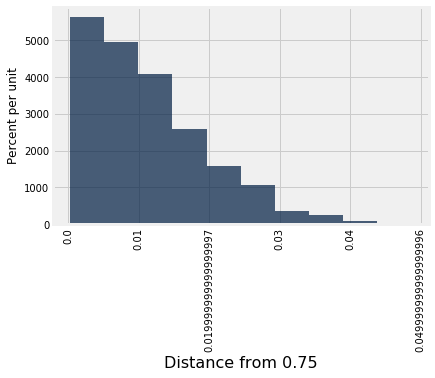

In [6]:
model_colors = make_array('Purple', 'Purple', 'Purple', 'White')

repetitions = 5000

sampled_stats = make_array()

for i in np.arange(repetitions):
    new_sample = np.random.choice(model_colors, total_plants)
    proportion_purple = np.count_nonzero(new_sample == 'Purple')/total_plants
    sampled_stats = np.append(sampled_stats, abs(proportion_purple - 0.75))

results = Table().with_column('Distance from 0.75', sampled_stats)
results.hist()

In [7]:
## 4. Compare the Prediction to the Observed Data

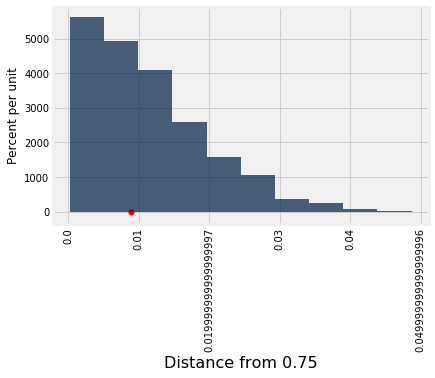

In [8]:
results.hist()

#Plot the observed statistic as a large red point on the horizontal axis
plots.scatter(observed_statistic, 0, color='red', s=30);

In [9]:
# use p value for quantitative comparison 
# between observed statistic and null distribution
empirical_P = np.count_nonzero(sampled_stats >= observed_statistic)/repetitions
empirical_P

0.5392

# Birth months

What month were you born in?

* A) Jan-Mar
* B) Apr-Jun
* C) Jul-Sep
* D) Oct-Dec

In [10]:
birth_month = Table().with_columns(
    "Month", make_array("Jan-Mar", "Apr-Jun", "Jul-Sep", "Oct-Dec"),
    "Count", make_array(5,6,5,7))
birth_month

Month,Count
Jan-Mar,5
Apr-Jun,6
Jul-Sep,5
Oct-Dec,7


In [11]:
size_of_class = sum(birth_month.column("Count"))
observed_statistic = sum(abs(birth_month.column("Count")/size_of_class - .25))
observed_statistic

0.13043478260869568

How likely is this distribution of birth months?

In [12]:
random_counts = birth_month.select("Month").sample(size_of_class).group("Month")
random_counts

tvds = make_array()
for i in np.arange(10000): # 10000 repetitions
    random_counts = birth_month.select("Month").sample(size_of_class).group("Month").column("count")
    tvd = sum(abs(random_counts/sum(random_counts) - .25))
    tvds = np.append(tvds, tvd)
    
results = Table().with_column('TVD', tvds)

results

TVD
0.23913
0.130435
0.23913
0.326087
0.217391
0.304348
0.478261
0.152174
0.456522
0.217391


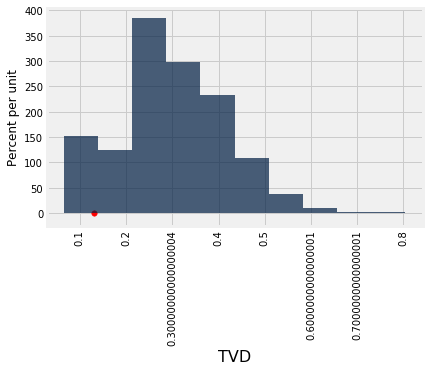

In [13]:
results.hist()

#Plot the observed statistic as a large red point on the horizontal axis
plots.scatter(observed_statistic, 0, color='red', s=30);

In [14]:
results.where('TVD', are.above_or_equal_to(observed)).num_rows / 10000

NameError: name 'observed' is not defined

# Jelly beans

![jelly](https://imgs.xkcd.com/comics/significant.png)

In [15]:
def test_stat(sample):
    return sum(sample=='Some') / len(sample)

def simulate_once(n_patients):
    acne_levels = make_array('Some', 'None')
    sample = np.random.choice(acne_levels, n_patients, p=make_array(.2, .8))
    return test_stat(sample)

In [16]:
simulate_once(10)

0.0

In [17]:
n = 1000
nrep = 10000
acne_fractions = make_array()
for i in range(nrep):
    acne_fractions = np.append(acne_fractions, simulate_once(n))
    
acne_fractions

array([0.195, 0.202, 0.2  , ..., 0.209, 0.195, 0.193])

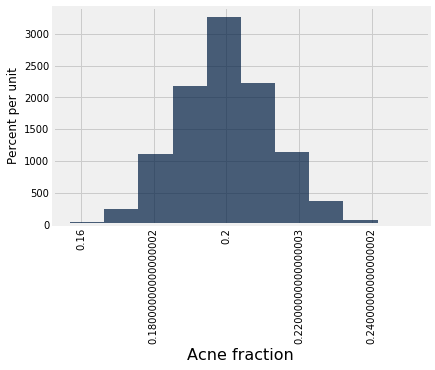

In [18]:
Table().with_column("Acne fraction", acne_fractions).hist()

In [19]:
# for each color jellybean, count fraction of jellybean eaters with acne:
s = "A&W Cream Soda, A&W Root Beer, Berry Blue, Blueberry, Bubble Gum, Buttered Popcorn, Cantaloupe, Cappuccino, Caramel Corn, Chili Mango, Chocolate Pudding, Cinnamon, Coconut, Cotton Candy, Crushed Pineapple, Dr Pepper, French Vanilla, Green Apple, Island Punch, Juicy Pear, Kiwi, Lemon Drop, Lemon Lime, Sunkist Lemon, Licorice, Sunkist Lime, Mango, Margarita, Mixed Berry Smoothie, Orange Sherbet, Sunkist Orange, Peach, Sunkist Pink Grapefruit, Piña Colada, Plum, Pomegranate, Raspberry, Red Apple, Sizzling Cinnamon, Sour Cherry, Strawberry Cheesecake, Strawberry Daiquiri, Strawberry Jam, Sunkist Tangerine, Toasted Marshmallow, Top Banana, Tutti-Fruitti, Very Cherry, Watermelon, Wild Blackberry"
flavors = s.split(",")
# (there are 50 flavors)

for jelly in flavors:
    observed_statistic = simulate_once(1000)

    # and compute the P-value (an approximation based on the simulation)
    pval = sum(acne_fractions>=observed_statistic) / len(acne_fractions)
    if pval < .05:
        print(observed_statistic*100,"% of people eating", jelly, "jelly bean had acne")
        print("P value is", pval)
        print("Publish!", jelly, "flavor jelly causes acne.")
    else:
        continue

22.3 % of people eating  Dr Pepper jelly bean had acne
P value is 0.0412
Publish!  Dr Pepper flavor jelly causes acne.
22.7 % of people eating  Sunkist Pink Grapefruit jelly bean had acne
P value is 0.0211
Publish!  Sunkist Pink Grapefruit flavor jelly causes acne.
